In [1]:
import matplotlib.pyplot as plt
import sys
import os
import numpy as np
from tqdm import tqdm

# Add the project root to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(project_root)

import dagology as dag
from plot_utils import plot_power_law_fit, plot_histogram

np.random.seed(33)

In [2]:
%matplotlib inline

In [3]:
N = 500
D = 2

In [4]:
angles = []
skewed_angles = []

for i in tqdm(range(1000)):
    DAG = dag.CausalSetGraph()
    R = dag.minkowski_interval(N, D)
    G = DAG.generate_graph(R, weighted=True)
    greedy_forward = DAG.traverse_path(dag.greedy_shortest_path, 'forward')
    angles.extend(DAG.compute_path_property(greedy_forward, dag.paths.get_angles).values())
    skewed_angles.extend(DAG.compute_path_property(greedy_forward, dag.paths.get_skewed_angles_minkowski).values())

100%|██████████| 1000/1000 [02:54<00:00,  5.72it/s]


Fitted Beta Distribution Parameters:
alpha =  0.2834
beta =  0.2945
loc = -0.7854
scale =  1.5708


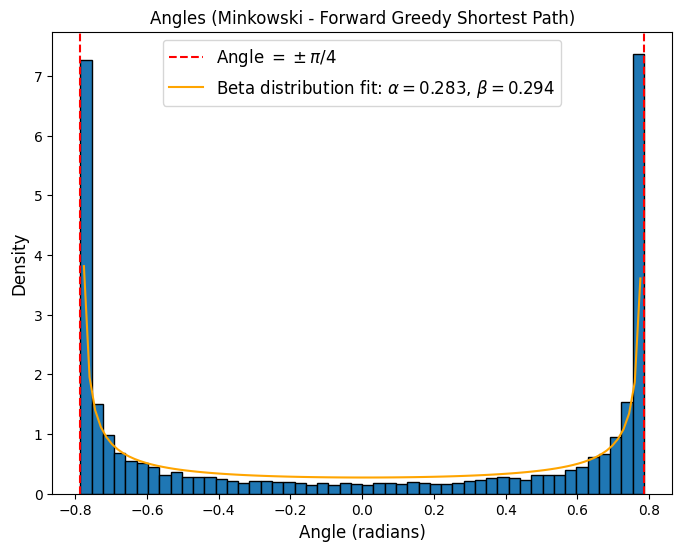

In [5]:
plot_histogram(angles, density=True, title="Angles (Minkowski - Forward Greedy Shortest Path)", x_label="Angle (radians)", beta_fit=True, savefig='/greedy/angles.svg')

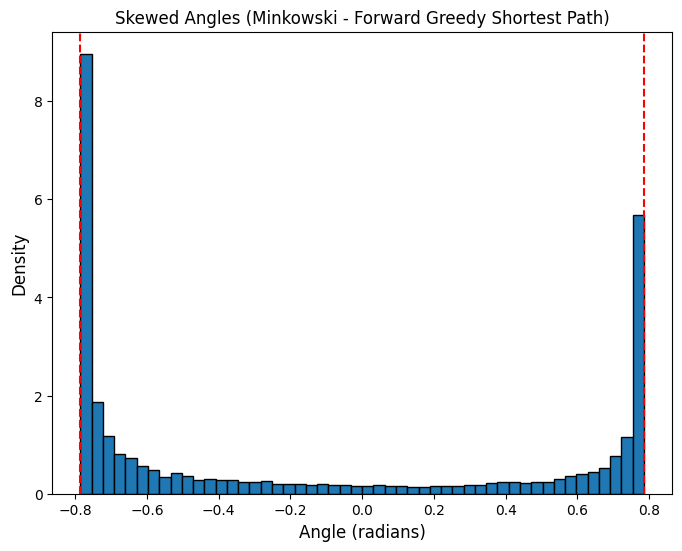

In [6]:
plot_histogram(skewed_angles, density=True, title="Skewed Angles (Minkowski - Forward Greedy Shortest Path)", x_label="Angle (radians)", savefig='/greedy/skewed_angles.svg')

In [7]:
n_iter = 300
n_range = np.logspace(1.1, 3, 50).astype(int)
shape = (len(n_range), n_iter)

angles_rms_iter = np.zeros(shape)
avg_distances_to_geodesic_iter = np.zeros(shape)

for idx, n in enumerate(tqdm(n_range)):
    for i in range(n_iter):
        DAG = dag.CausalSetGraph()
        R = dag.minkowski_interval(n, D)
        G = DAG.generate_graph(R, weighted=True)
        greedy_forward = DAG.traverse_path(dag.greedy_shortest_path, 'forward')
        _, rms_deviation = DAG.compute_path_property(greedy_forward, dag.paths.get_angles_rms_deviation_minkowski)
        angles_rms_iter[idx, i] = rms_deviation
        avg_distances_to_geodesic_iter[idx, i] = np.mean(list(
            DAG.compute_path_property(greedy_forward, dag.paths.get_distance_to_geodesic_minkowski).values()
        ))

# Compute means and standard deviations
angles_rms= np.mean(angles_rms_iter, axis=1)
avg_distances_to_geodesic = np.mean(avg_distances_to_geodesic_iter, axis=1)
angles_rms_std = np.std(angles_rms_iter, axis=1) / np.sqrt(n_iter)
avg_distances_to_geodesic_std = np.std(avg_distances_to_geodesic_iter, axis=1) / np.sqrt(n_iter)

100%|██████████| 50/50 [21:21<00:00, 25.63s/it] 


Fitted power: -0.0635 +- 0.0032
Fitted coefficient:  0.3468 +- 0.0053


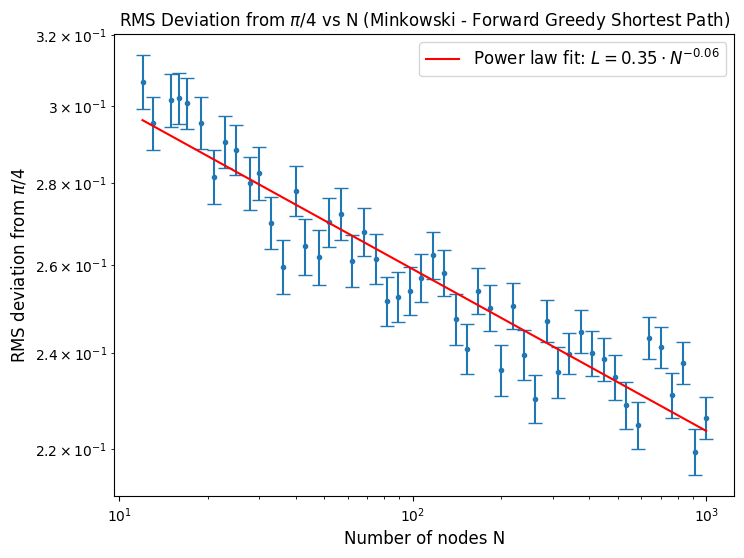

In [8]:
plot_power_law_fit(n_range, angles_rms, errors=angles_rms_std,
    title='RMS Deviation from $\pi$/4 vs N (Minkowski - Forward Greedy Shortest Path)',
    x_label="Number of nodes N",
    y_label="RMS deviation from $\pi$/4",
    savefig='/greedy/rms_deviation.svg')

Fitted power:  0.0399 +- 0.0037
Fitted coefficient:  0.1022 +- 0.0019


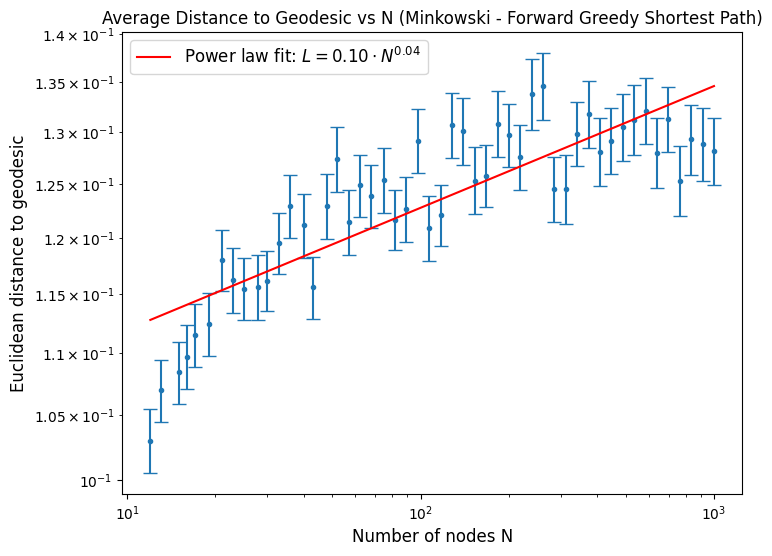

In [9]:
plot_power_law_fit(n_range, avg_distances_to_geodesic, errors=avg_distances_to_geodesic_std,
    title='Average Distance to Geodesic vs N (Minkowski - Forward Greedy Shortest Path)',
    x_label="Number of nodes N",
    y_label="Euclidean distance to geodesic",
    savefig='/greedy/distance_to_geodesic.svg')